### Using ONE of the following sources, complete the questions for only that source. 
### Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29
### Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
### Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since its not binary like the others, but if you really want to master these concepts, you should pick this one. 
### Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.    

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image

ab_df=pd.read_csv('abalone.data',delimiter=',',header=None)
ab_df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
ab_df.columns=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
ab_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


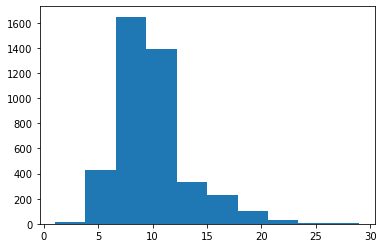

In [18]:
ab_df['rings'].value_counts()

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(ab_df['rings'])
plt.show()

#### 1. Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

Unnecessary preprocessing steps - Remove unnecessary columns (all are necessary), deal with null values (they were already removed from the dataset prior to it's placing on the internet), standardize columns (this was done by the file owner by dividing all continuous values by 200).

Necessary preprocessing step - one hot encode the sex column.

In [5]:
aba_df=pd.get_dummies(ab_df)
aba_df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


Visualize correlation

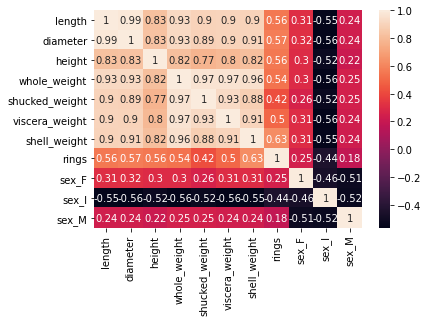

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn

corrMatrix = aba_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Create X and y values

In [7]:
X= aba_df.drop('rings', axis=1)
y=aba_df['rings']

Split the dataset

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#### 2. Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [9]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.11954590826805622

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini', max_depth=4)

dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.2811004784688995

In [11]:
predictions = dt.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.37      0.77      0.50        13
           5       0.38      0.34      0.36        32
           6       0.33      0.52      0.40        48
           7       0.35      0.19      0.25        84
           8       0.27      0.47      0.35        99
           9       0.34      0.26      0.29       142
          10       0.24      0.42      0.30       139
          11       0.25      0.29      0.27        93
          12       0.00      0.00      0.00        51
          13       0.17      0.13      0.15        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3. Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

Changed n_estimators to 100, added max_depth of 7. Observed that max_leaf_nodes of 25 improved recall at the expense of precision so I did not include it.  All other parameters decreased performance of the model.

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state =42)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.3026315789473684

In [13]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.40      0.77      0.53        13
           5       0.45      0.31      0.37        32
           6       0.38      0.23      0.29        48
           7       0.38      0.39      0.38        84
           8       0.32      0.46      0.38        99
           9       0.29      0.39      0.33       142
          10       0.27      0.38      0.31       139
          11       0.29      0.30      0.30        93
          12       0.25      0.06      0.10        51
          13       0.04      0.03      0.04        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.33      0.08      0.12        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4. Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [14]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:12:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.2284688995215311

In [16]:
predictions = xg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.25      0.33      0.29         3
           4       0.29      0.38      0.33        13
           5       0.43      0.31      0.36        32
           6       0.34      0.29      0.31        48
           7       0.29      0.27      0.28        84
           8       0.26      0.33      0.29        99
           9       0.24      0.30      0.27       142
          10       0.24      0.24      0.24       139
          11       0.17      0.17      0.17        93
          12       0.14      0.12      0.13        51
          13       0.07      0.10      0.08        31
          14       0.08      0.04      0.05        26
          15       0.00      0.00      0.00        21
          16       0.11      0.08      0.09        13
          17       0.14      0.12      0.13         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined an

#### 5. Which model performed best? What is your performance metric? Why? 